In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import libs/packages here, set constant number

In [2]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
TOP_RANK = 10

### Import Data from the same location as this Jupyter notebook

In [ ]:
# df = pd.read_excel("H-1B_FY14_Q4.xlsx")
# df = pd.read_excel("H-1B_Disclosure_Data_FY15_Q4.xlsx")
# df = pd.read_excel("H-1B_Disclosure_Data_FY16.xlsx")

In [ ]:
# pickle_out = open("2014.pickle", "wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

# pickle_out = open("2015.pickle", "wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

# pickle_out = open("2016.pickle", "wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

In [ ]:
pickle_in = open("2014.pickle", "rb")
df_2014 = pickle.load(pickle_in)
pickle_in = open("2015.pickle", "rb")
df_2015 = pickle.load(pickle_in)
pickle_in = open("2016.pickle", "rb")
df_2016 = pickle.load(pickle_in)

### Definition of functions here  

In [4]:
def rank_bar(item_counts,top_ranking=TOP_RANK):
    """
    bar plot for the top_ranking on the items and their freq 
    top_ranking: default is 10
    """
    print(item_counts.iloc[:top_ranking])
    bar_plot = sns.barplot(x=item_counts.iloc[:top_ranking].index,y=item_counts.iloc[:top_ranking])
    loc, xticklabels = plt.xticks()
    bar_plot.set_xticklabels(xticklabels, rotation=90)
    plt.show()
    
    
def field_bar(df,head):
    """
    bar plot the column name matching up head
    """
    matcher = [ i for i in list(df) if re.search(head,i)]
    if matcher:       
        head = matcher[0]
        df_col = df[head]
        item_counts = df[head].value_counts()
#         print(item_counts)
        rank_bar(item_counts)
    else: 
        print("There is no filed contains: ", head)
        
def remove_duplicated_row(df):
    """
    remove the duplicated row only keep the first appear
    """
    print("Before remove",df.shape)
#     print(df.duplicated().value_counts().index)
    df = df[~df.duplicated(keep='first')] 
    print("After remove",df.shape)
    return df

def remove_nan_row(df,important_list):
    """
    Regex match items in important_list and remove any row with NaN in these 
    """
    id_stat = [head for head in list(df) for item in important_list if re.search(item, head) ]
#     print(df[id_stat].isnull().sum())
    df = df.dropna(subset=id_stat)
    print("After dropna....")
    print(df[id_stat].isnull().sum())
    return df,id_stat

### Clean Data

In [5]:
df_list = [df_2014,df_2015,df_2016]
year_list = ['2014','2015','2016']

# print fileds list 
for j, df in enumerate(df_list):
    print(year_list[j],list(df),"\n")

2014 ['LCA_CASE_NUMBER', 'STATUS', 'LCA_CASE_SUBMIT', 'DECISION_DATE', 'VISA_CLASS', 'LCA_CASE_EMPLOYMENT_START_DATE', 'LCA_CASE_EMPLOYMENT_END_DATE', 'LCA_CASE_EMPLOYER_NAME', 'LCA_CASE_EMPLOYER_ADDRESS', 'LCA_CASE_EMPLOYER_CITY', 'LCA_CASE_EMPLOYER_STATE', 'LCA_CASE_EMPLOYER_POSTAL_CODE', 'LCA_CASE_SOC_CODE', 'LCA_CASE_SOC_NAME', 'LCA_CASE_JOB_TITLE', 'LCA_CASE_WAGE_RATE_FROM', 'LCA_CASE_WAGE_RATE_TO', 'LCA_CASE_WAGE_RATE_UNIT', 'FULL_TIME_POS', 'TOTAL_WORKERS', 'LCA_CASE_WORKLOC1_CITY', 'LCA_CASE_WORKLOC1_STATE', 'PW_1', 'PW_UNIT_1', 'PW_SOURCE_1', 'OTHER_WAGE_SOURCE_1', 'YR_SOURCE_PUB_1', 'LCA_CASE_WORKLOC2_CITY', 'LCA_CASE_WORKLOC2_STATE', 'PW_2', 'PW_UNIT_2', 'PW_SOURCE_2', 'OTHER_WAGE_SOURCE_2', 'YR_SOURCE_PUB_2', 'LCA_CASE_NAICS_CODE'] 

2015 ['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_

Remove the duplicated rows and keep only the first appear

In [6]:
for j, df in enumerate(df_list):
    df = remove_duplicated_row(df)

Before remove (519504, 35)
After remove (519504, 35)
Before remove (618804, 40)
After remove (618803, 40)
Before remove (647852, 40)
After remove (647852, 40)


1) Remove the those rows the date of submit is later than the contract ends date, not reasonable in logic

2) Remove the invalid data-format in EMPLOYMENT_START_DATE and EMPLOYMENT_END_DATE and replace with NaN

In [8]:
for df in df_list:
    field_list = [i for i in list(df) if re.search("CASE_SUBMIT",i) or re.search("EMPLOYMENT_END_DATE",i)]
    df[field_list[1]]  = pd.to_datetime(df[field_list[1]],errors='coerce')
    mask = ((df[field_list[1]]-df[field_list[0]]).astype('timedelta64[D]') > 0)
    df = df[mask]

In [9]:
for df in df_list:
    begin = [ i for i in list(df) if re.search("EMPLOYMENT_START_DATE",i)][0]
    df[begin] = pd.to_datetime(df[begin],errors='coerce')

Remove the rows with NaN in those columns have key words in the list "col_notNaN"

In [10]:
col_notNaN = ['CASE_NUMBER', 'STATUS', 'CASE_SUBMIT', 'DECISION_DATE', 
              'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
             "WAGE.*UNIT","WAGE.*RATE"]

for df in df_list:
    df = remove_nan_row(df,col_notNaN)

After dropna....
LCA_CASE_NUMBER                   0
STATUS                            0
LCA_CASE_SUBMIT                   0
DECISION_DATE                     0
VISA_CLASS                        0
LCA_CASE_EMPLOYMENT_START_DATE    0
LCA_CASE_EMPLOYMENT_END_DATE      0
LCA_CASE_EMPLOYER_NAME            0
LCA_CASE_WAGE_RATE_FROM           0
LCA_CASE_WAGE_RATE_TO             0
LCA_CASE_WAGE_RATE_UNIT           0
LCA_CASE_WAGE_RATE_UNIT           0
dtype: int64
After dropna....
CASE_NUMBER              0
CASE_STATUS              0
CASE_SUBMITTED           0
DECISION_DATE            0
VISA_CLASS               0
EMPLOYMENT_START_DATE    0
EMPLOYMENT_END_DATE      0
EMPLOYER_NAME            0
WAGE_RATE_OF_PAY         0
WAGE_UNIT_OF_PAY         0
dtype: int64
After dropna....
CASE_NUMBER              0
CASE_STATUS              0
CASE_SUBMITTED           0
DECISION_DATE            0
VISA_CLASS               0
EMPLOYMENT_START_DATE    0
EMPLOYMENT_END_DATE      0
EMPLOYER_NAME            0
WAGE_

### Data and their stories

The final result for application is the most important 

In [11]:
#the valid statuses types remain the same for all the time we extract this information from 2014
head = [ i for i in list(df_2014) if re.search("STATUS",i)][0]
valid_status_list = df_2014[head].value_counts().iloc[:4].index.values

Convert wage unit and bottom limit of salary into the minimum annual salary column name "total_salary"

In [20]:
for j, df in enumerate(df_list):
    print(year_list[j])
    # convert unit into int for later total calculation
    pay_unit = [ i for i in list(df) if re.search("WAGE.*UNIT",i)][0]
    wage_unit = df[pay_unit].values
    salary_unit=np.array(wage_unit)
    salary_unit[salary_unit=='Year']=1
    salary_unit[salary_unit=='Week']=52
    salary_unit[salary_unit=='Bi-Weekly']=26
    salary_unit[salary_unit=='Month']=12
    salary_unit[salary_unit=='Hour']=416

    start_salary = []
    pay_rate = [ i for i in list(df) if re.search("WAGE.*RATE",i)][0]
    if df[pay_rate].dtype == 'object':
        for i in  df[pay_rate].values:
            try:
                temp = str(i).replace(" ", "")
                temp = str(temp).split("-")[0]
                temp = float(temp)
                start_salary.append(temp)
            except ValueError:
                start_salary.append(0.0)
    else:
        start_salary = df[pay_rate]
    start_salary = np.array(start_salary)
    start_salary = start_salary.astype(float)
    df["total_salary"] = np.multiply(salary_unit,start_salary)
    print("Static data for the mini-annual-salary")
    print(df["total_salary"].describe(),'\n')
    head = [ i for i in list(df) if re.search("STATUS",i)][0]
    print("Static data divided by different status")
    for stat in valid_status_list: 
        mask = (df[head] == stat)
        print(stat,"-------")
        print(df[mask]["total_salary"].describe(),"\n")


2014
Static data for the mini-annual-salary
count     519465.0
unique     44782.0
top        60000.0
freq       33186.0
Name: total_salary, dtype: float64 

Static data divided by different status
CERTIFIED -------
count     455144.0
unique     41107.0
top        60000.0
freq       29439.0
Name: total_salary, dtype: float64 

CERTIFIED-WITHDRAWN -------
count     36350.0
unique     8835.0
top       60000.0
freq       2476.0
Name: total_salary, dtype: float64 

WITHDRAWN -------
count     16037.0
unique     5045.0
top       60000.0
freq        740.0
Name: total_salary, dtype: float64 

DENIED -------
count     11931.0
unique     4026.0
top       60000.0
freq        531.0
Name: total_salary, dtype: float64 

2015
Static data for the mini-annual-salary
count     618774.0
unique     48338.0
top        60000.0
freq       45531.0
Name: total_salary, dtype: float64 

Static data divided by different status
CERTIFIED -------
count     547278.0
unique     44740.0
top        60000.0
freq       4

#### Different Status with total mini-salary distribution
the most minimal annual salary is 60000

2014
60000.0     29439
70000.0     11035
65000.0     10942
80000.0      8344
75000.0      7544
90000.0      6686
100000.0     6316
85000.0      5145
72000.0      4528
110000.0     4277
Name: total_salary, dtype: int64


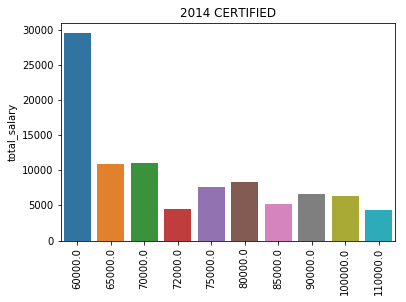

60000.0     2476
65000.0     1014
70000.0      906
100000.0     673
80000.0      622
75000.0      562
90000.0      536
85000.0      436
105000.0     413
55000.0      398
Name: total_salary, dtype: int64


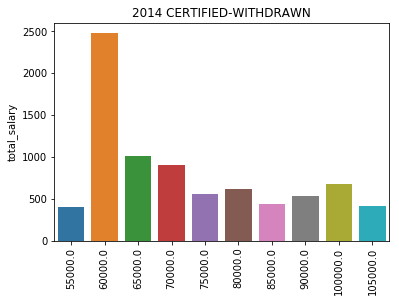

60000.0     740
65000.0     465
70000.0     335
90000.0     298
80000.0     288
75000.0     278
100000.0    234
85000.0     193
110000.0    169
55000.0     161
Name: total_salary, dtype: int64


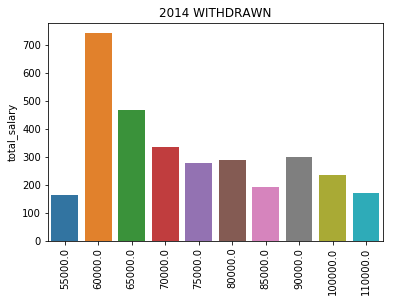

60000.0     531
65000.0     250
70000.0     231
75000.0     197
80000.0     192
90000.0     187
50000.0     173
55000.0     158
100000.0    145
45000.0     116
Name: total_salary, dtype: int64


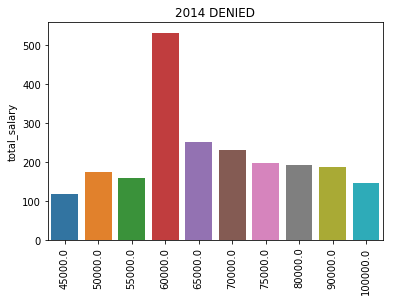

2015
60000.0     40661
65000.0     13614
70000.0     12531
75000.0      9537
80000.0      9407
90000.0      7908
100000.0     7752
85000.0      6232
72000.0      5771
110000.0     5258
Name: total_salary, dtype: int64


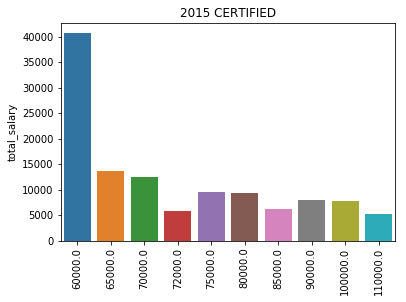

60000.0     3137
65000.0     1243
70000.0     1012
80000.0      735
90000.0      679
100000.0     645
75000.0      638
110000.0     629
85000.0      505
105000.0     443
Name: total_salary, dtype: int64


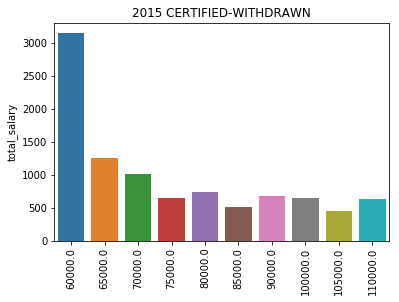

60000.0     1246
65000.0      513
70000.0      442
80000.0      351
75000.0      351
90000.0      322
100000.0     294
85000.0      250
95000.0      206
120000.0     203
Name: total_salary, dtype: int64


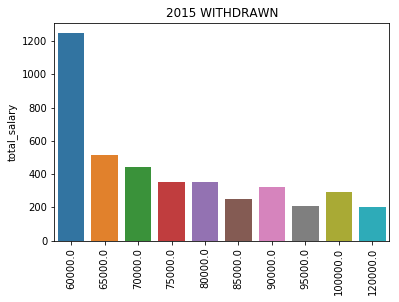

60000.0     487
65000.0     242
70000.0     214
75000.0     207
50000.0     187
80000.0     169
90000.0     145
45000.0     142
100000.0    124
85000.0     124
Name: total_salary, dtype: int64


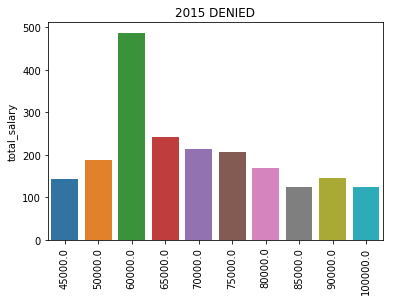

2016
60000.0     39958
65000.0     14992
70000.0     13626
75000.0     10937
80000.0      9347
90000.0      8009
100000.0     7150
85000.0      6626
72000.0      5237
110000.0     5158
Name: total_salary, dtype: int64


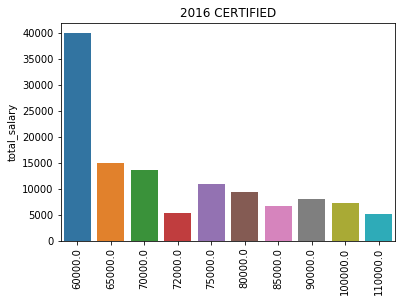

60000.0     4313
70000.0     1303
65000.0     1218
75000.0      783
90000.0      716
80000.0      679
100000.0     648
110000.0     571
85000.0      534
62000.0      515
Name: total_salary, dtype: int64


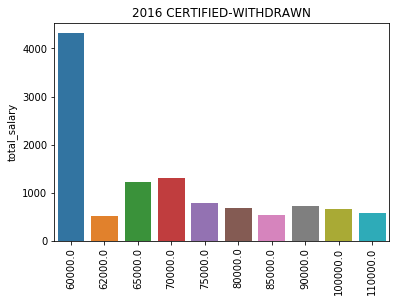

60000.0     1698
65000.0      493
70000.0      458
75000.0      421
80000.0      400
90000.0      339
100000.0     315
85000.0      258
120000.0     225
95000.0      214
Name: total_salary, dtype: int64


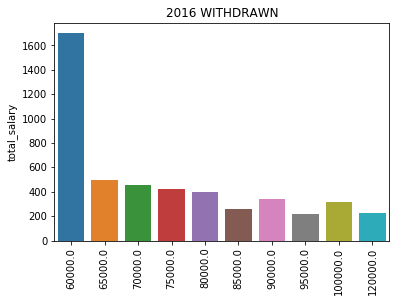

60000.0     529
65000.0     204
75000.0     199
70000.0     167
80000.0     142
90000.0     126
100000.0    123
50000.0     113
55000.0      94
85000.0      86
Name: total_salary, dtype: int64


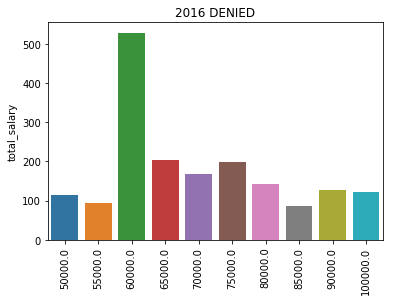

In [13]:
for j, df in enumerate(df_list):
    print(year_list[j])
    head = [ i for i in list(df) if re.search("STATUS",i)][0]
    for stat in valid_status_list: 
        mask = (df[head] == stat)
        plt.title(year_list[j]+" "+stat)
        field_bar(df[mask],"total_salary")

Which TOP10 job positions, employer, working city and job titles in the last three years : 
    
    Top one job position : Computer Systems Analysts / SOFTWARE DEVELOPERS, APPLICATIONS 
    
    Top one employer : INFOSYS LIMITED
    
    Top one work city : New York
    
    Top one job title : PROGRAMMER ANALYST

Computer Systems Analysts                      92984
Software Developers, Applications              77878
Computer Programmers                           72353
Computer Occupations, All Other                39573
Software Developers, Systems Software          15726
Management Analysts                            11654
Accountants and Auditors                        9488
Financial Analysts                              9316
Network and Computer Systems Administrators     8182
Mechanical Engineers                            7402
Name: LCA_CASE_SOC_NAME, dtype: int64


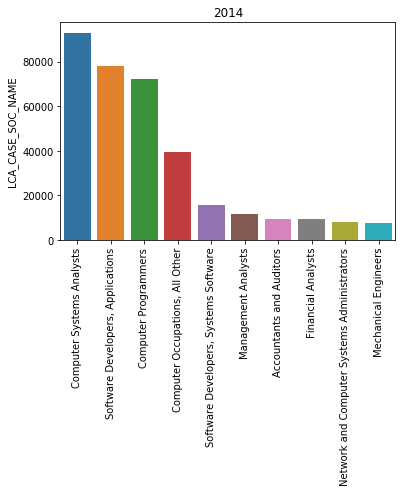

INFOSYS LIMITED                      23759
TATA CONSULTANCY SERVICES LIMITED    14098
WIPRO LIMITED                         8365
DELOITTE CONSULTING LLP               7017
ACCENTURE LLP                         5498
IBM INDIA PRIVATE LIMITED             5029
HCL AMERICA, INC.                     4749
LARSEN & TOUBRO INFOTECH LIMITED      3939
MICROSOFT CORPORATION                 3750
ERNST & YOUNG U.S. LLP                3727
Name: LCA_CASE_EMPLOYER_NAME, dtype: int64


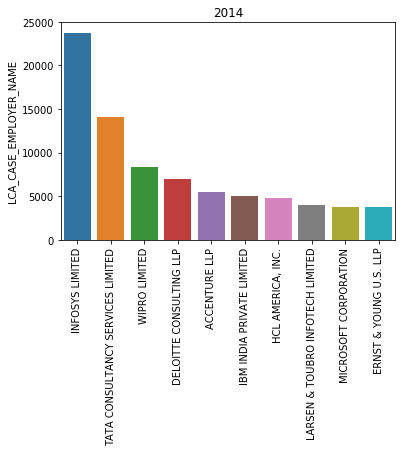

NEW YORK         32185
HOUSTON          15292
SAN FRANCISCO    11371
SAN JOSE          9273
ATLANTA           8939
CHICAGO           8740
SUNNYVALE         6565
DALLAS            5915
MOUNTAIN VIEW     5338
BOSTON            5218
Name: LCA_CASE_WORKLOC1_CITY, dtype: int64


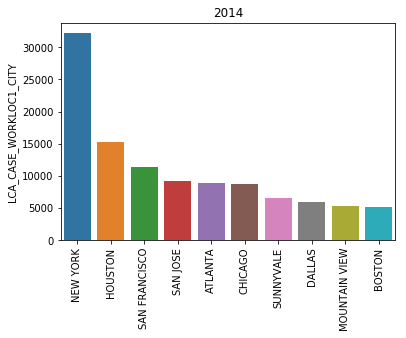

PROGRAMMER ANALYST          43114
SOFTWARE ENGINEER           20500
COMPUTER PROGRAMMER         14950
SYSTEMS ANALYST             10196
SOFTWARE DEVELOPER           7337
BUSINESS ANALYST             7302
COMPUTER SYSTEMS ANALYST     6821
TECHNOLOGY LEAD - US         5057
TECHNOLOGY ANALYST - US      4913
SENIOR CONSULTANT            4898
Name: LCA_CASE_JOB_TITLE, dtype: int64


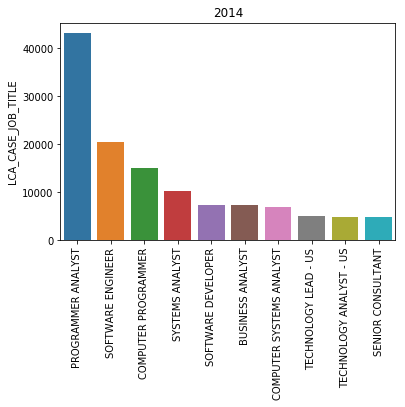

COMPUTER SYSTEMS ANALYSTS                      116600
SOFTWARE DEVELOPERS, APPLICATIONS              100548
COMPUTER PROGRAMMERS                            90158
COMPUTER OCCUPATIONS, ALL OTHER                 54676
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE           17508
MANAGEMENT ANALYSTS                             13107
ACCOUNTANTS AND AUDITORS                        10912
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS     10490
FINANCIAL ANALYSTS                               9796
MECHANICAL ENGINEERS                             8404
Name: SOC_NAME, dtype: int64


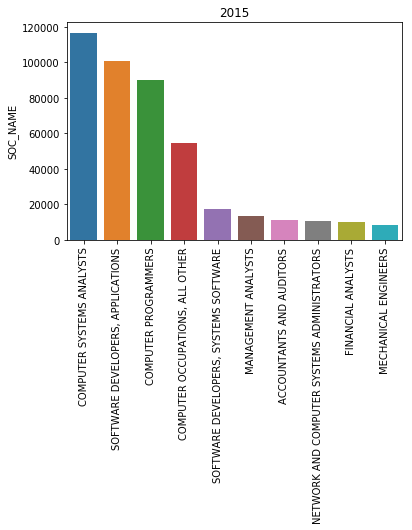

INFOSYS LIMITED                      33245
TATA CONSULTANCY SERVICES LIMITED    16562
WIPRO LIMITED                        12201
IBM INDIA PRIVATE LIMITED            10693
ACCENTURE LLP                         9605
DELOITTE CONSULTING LLP               7607
HCL AMERICA, INC.                     6110
MICROSOFT CORPORATION                 4575
IGATE TECHNOLOGIES INC.               4554
ERNST & YOUNG U.S. LLP                4144
Name: EMPLOYER_NAME, dtype: int64


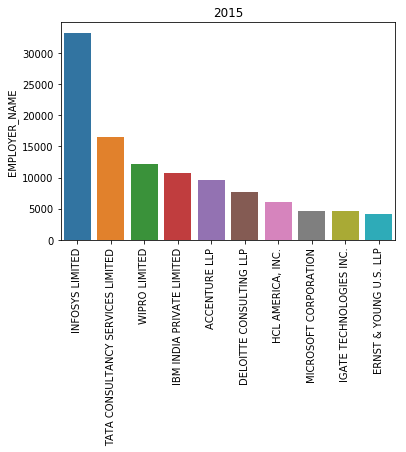

NEW YORK         36172
HOUSTON          17458
SAN FRANCISCO    14375
ATLANTA          11522
SAN JOSE         10972
CHICAGO          10294
SUNNYVALE         8359
CHARLOTTE         6962
IRVING            6709
DALLAS            6606
Name: WORKSITE_CITY, dtype: int64


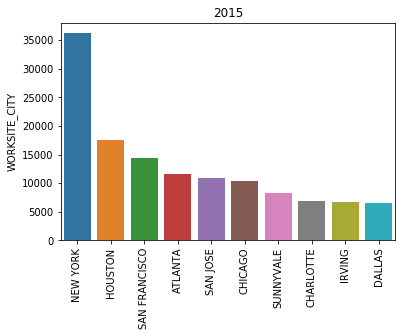

PROGRAMMER ANALYST          53437
SOFTWARE ENGINEER           27260
COMPUTER PROGRAMMER         14055
SYSTEMS ANALYST             12803
SOFTWARE DEVELOPER          10441
BUSINESS ANALYST             8853
TECHNOLOGY LEAD - US         8242
COMPUTER SYSTEMS ANALYST     7918
TECHNOLOGY ANALYST - US      7014
SENIOR SOFTWARE ENGINEER     6013
Name: JOB_TITLE, dtype: int64


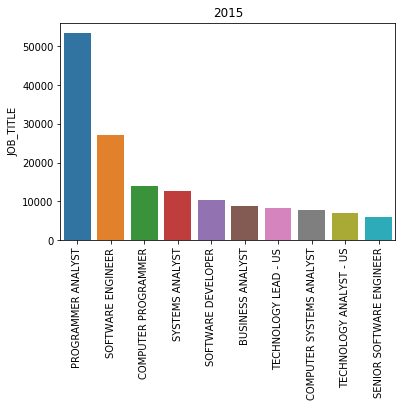

SOFTWARE DEVELOPERS, APPLICATIONS              121239
COMPUTER SYSTEMS ANALYSTS                       98756
COMPUTER PROGRAMMERS                            81822
COMPUTER OCCUPATIONS, ALL OTHER                 53880
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE           21852
COMPUTER SYSTEMS ANALYST                        16835
MANAGEMENT ANALYSTS                             15010
ACCOUNTANTS AND AUDITORS                        11205
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS     11152
MECHANICAL ENGINEERS                             9616
Name: SOC_NAME, dtype: int64


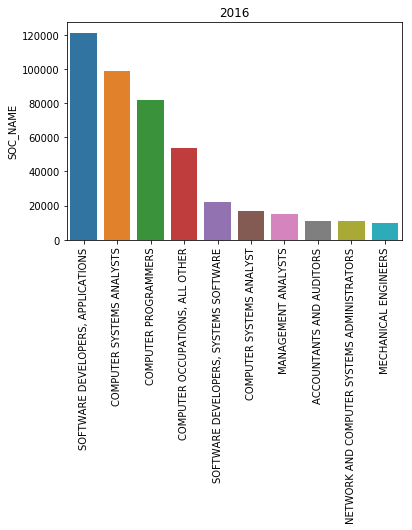

INFOSYS LIMITED                                    25353
CAPGEMINI AMERICA INC                              16725
TATA CONSULTANCY SERVICES LIMITED                  13134
WIPRO LIMITED                                      10607
IBM INDIA PRIVATE LIMITED                           9787
ACCENTURE LLP                                       9477
DELOITTE CONSULTING LLP                             7646
TECH MAHINDRA (AMERICAS),INC.                       6746
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     5370
MICROSOFT CORPORATION                               5029
Name: EMPLOYER_NAME, dtype: int64


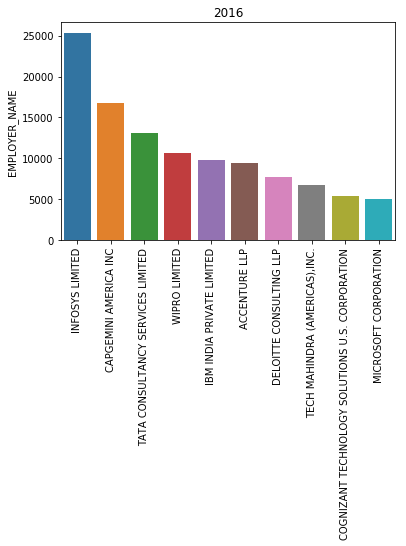

NEW YORK         39788
HOUSTON          16372
SAN FRANCISCO    15657
ATLANTA          12904
CHICAGO          12570
SAN JOSE         10772
SUNNYVALE         8531
IRVING            8341
CHARLOTTE         7518
MOUNTAIN VIEW     7455
Name: WORKSITE_CITY, dtype: int64


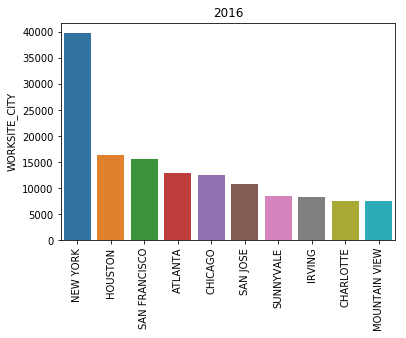

PROGRAMMER ANALYST          53743
SOFTWARE ENGINEER           30668
SOFTWARE DEVELOPER          14041
SYSTEMS ANALYST             12314
COMPUTER PROGRAMMER         11668
BUSINESS ANALYST             9167
COMPUTER SYSTEMS ANALYST     6900
SENIOR SOFTWARE ENGINEER     6439
DEVELOPER                    6084
TECHNOLOGY LEAD - US         5410
Name: JOB_TITLE, dtype: int64


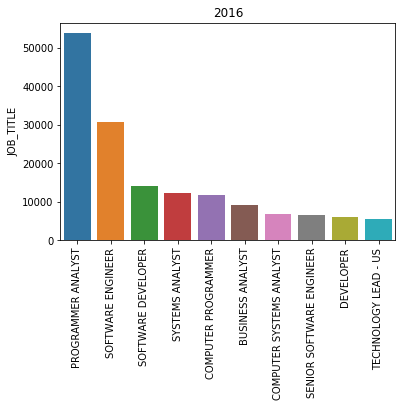

In [14]:
field_list = ['SOC_NAME','EMPLOYER_NAME','WORK.*CITY','JOB_TITLE']
i = 0
for df in df_list:
    year = year_list[i]
    i +=1
    for head in field_list:
        plt.title(year)
        field_bar(df,head)

# From Tableau

![](montly salary.png)

![](bubble2.png)

Which month is the most applications being decided : always March

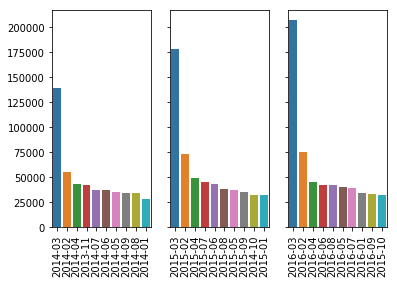

In [15]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    head = [ i for i in list(df) if re.search("DECISION_DATE",i)][0]
    df['decision_time'] = [pd.to_datetime(str(date)).strftime('%Y-%m') for date in  df[head].values]
    item_counts=df['decision_time'].value_counts().iloc[:10]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

Which month is the most applications being submitted: always March

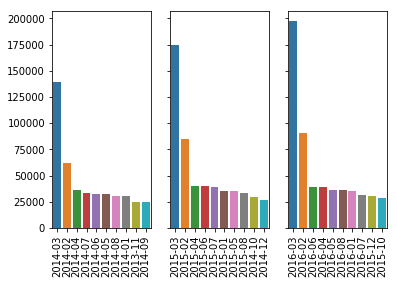

In [21]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    head = [ i for i in list(df) if re.search("CASE_SUBMIT",i)][0]
    df['submit_time'] = [pd.to_datetime(str(date)).strftime('%Y-%m') for date in df[head].values]
    item_counts=df['submit_time'].value_counts().iloc[:10]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

For those plots above we see some old history also appears in the another year. Keep it here because how does the dataset seperate into year not so clear 

How long time for an application from submit to deside, most are decided in 6 days 

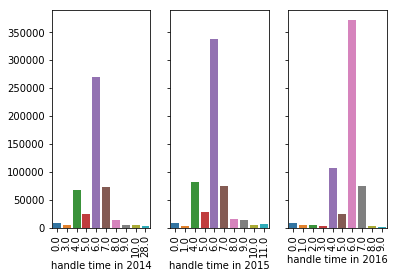

In [22]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    begin = [ i for i in list(df) if re.search("CASE_SUBMIT",i)][0]
    end = [ i for i in list(df) if re.search("DECISION_DATE",i)][0]
    df['time_cost'] = np.around(((df[end]-df[begin]).astype('timedelta64[D]')))
    item_counts=df['time_cost'].value_counts().iloc[:10]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(sorted(item_counts.index), rotation=90)
    bar_plot.set_xlabel('handle time'+" in "+year_list[j])
plt.show()

How long are the most contracts? Three years, but there are some application the contract less than half of the year which shows as 0.0 because use round

2014
3.0    464451
2.0     31013
1.0     19878
0.0      4147
4.0         2
5.0         1
dtype: int64
2015
3.0    557401
2.0     36585
1.0     21543
0.0      3244
4.0         2
dtype: int64
2016
3.0    590683
2.0     36002
1.0     18696
0.0      2438
4.0         1
dtype: int64


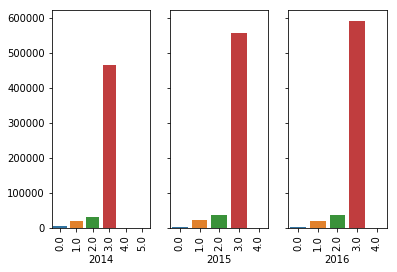

In [25]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    begin = [ i for i in list(df) if re.search("EMPLOYMENT_START_DATE",i)][0]
    end = [ i for i in list(df) if re.search("EMPLOYMENT_END_DATE",i)][0]

    
    df = df.dropna(subset =[begin,end])
    delta_days = pd.Series((df[end]-df[begin]).astype('timedelta64[D]'))
    # the gap between two dates must > 0
    delta_days = delta_days[delta_days >0] 
    delta_years = pd.Series(round(delta_days/365))

    item_counts = delta_years.value_counts().iloc[:10]
    print(year_list[j])
    print(item_counts)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(sorted(item_counts.index), rotation=90)
    bar_plot.set_xlabel(year_list[j])
plt.show()

Based on different status types, we find out which EMPLOYER / JOB TITLE is most CERTIFIED / DENIED / etc ...  
Most CERTIFIED: INFOSYS LIMITED 
Most Certified-Withdrawn: WIPRO LIMITED and GOOGLE INC
Most Withdrawn: IBM INDIA PRIVATE LIMITED and DELOITTE CONSULTING LLP
Most Denied: ERNST & YOUNG U.S. LLP and IBM INDIA PRIVATE LIMITED 
and PROGRAMMER ANALYST are the most standing out in any result status 

INFOSYS LIMITED                      23753
TATA CONSULTANCY SERVICES LIMITED    13972
WIPRO LIMITED                         7266
DELOITTE CONSULTING LLP               6978
ACCENTURE LLP                         5443
HCL AMERICA, INC.                     4688
IBM INDIA PRIVATE LIMITED             4113
LARSEN & TOUBRO INFOTECH LIMITED      3757
ERNST & YOUNG U.S. LLP                3548
IGATE TECHNOLOGIES INC.               3077
Name: LCA_CASE_EMPLOYER_NAME, dtype: int64


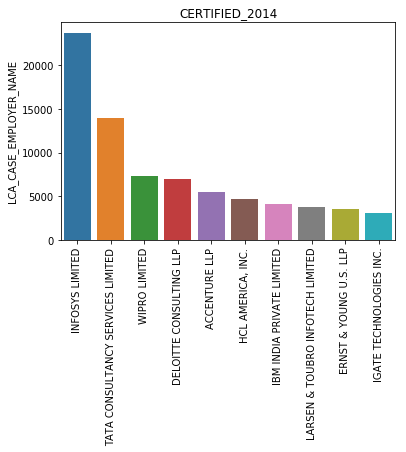

PROGRAMMER ANALYST          38625
SOFTWARE ENGINEER           17278
COMPUTER PROGRAMMER         13796
SYSTEMS ANALYST              9161
BUSINESS ANALYST             6529
SOFTWARE DEVELOPER           6473
COMPUTER SYSTEMS ANALYST     6204
TECHNOLOGY LEAD - US         5055
TECHNOLOGY ANALYST - US      4911
SENIOR CONSULTANT            4535
Name: LCA_CASE_JOB_TITLE, dtype: int64


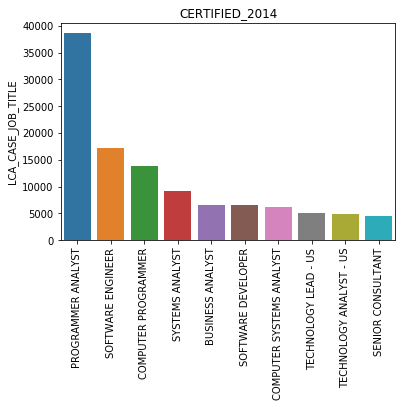

WIPRO LIMITED                   1039
MICROSOFT CORPORATION            683
GOOGLE INC.                      578
IBM CORPORATION                  321
QUALCOMM TECHNOLOGIES, INC.      299
POPULUS GROUP                    282
V-SOFT CONSULTING GROUP, INC     265
SUNERA TECHNOLOGIES, INC         248
ORACLE AMERICA, INC.             229
ALINDUS, INC.                    181
Name: LCA_CASE_EMPLOYER_NAME, dtype: int64


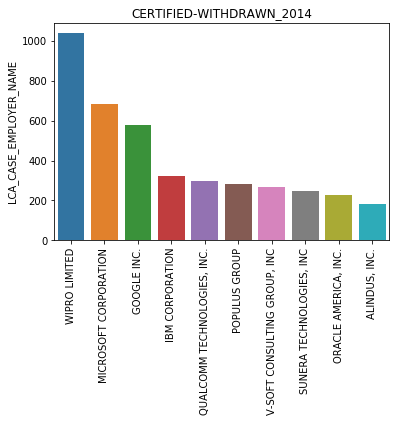

PROGRAMMER ANALYST          2803
SOFTWARE ENGINEER           2252
SYSTEMS ANALYST              659
ASSISTANT PROFESSOR          649
COMPUTER PROGRAMMER          571
SOFTWARE DEVELOPER           497
BUSINESS ANALYST             454
RESEARCH ASSOCIATE           450
SENIOR SOFTWARE ENGINEER     423
POSTDOCTORAL FELLOW          365
Name: LCA_CASE_JOB_TITLE, dtype: int64


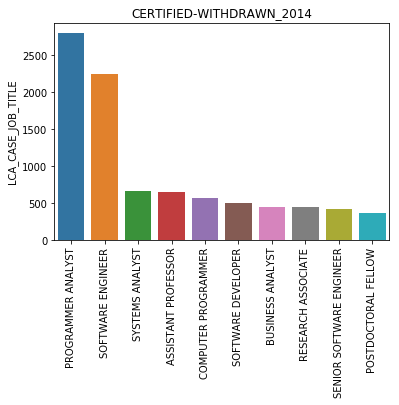

IBM INDIA PRIVATE LIMITED                          621
INTEL CORPORATION                                  280
IBM CORPORATION                                    261
AMERICAN INFORMATION TECHNOLOGY CORPORATION        144
BROADCOM CORPORATION                               142
LARSEN & TOUBRO INFOTECH LIMITED                   130
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION    105
GOLDMAN, SACHS & CO.                                91
L&T TECHNOLOGY SERVICES LIMITED                     89
PERSISTENT SYSTEMS, INC.                            89
Name: LCA_CASE_EMPLOYER_NAME, dtype: int64


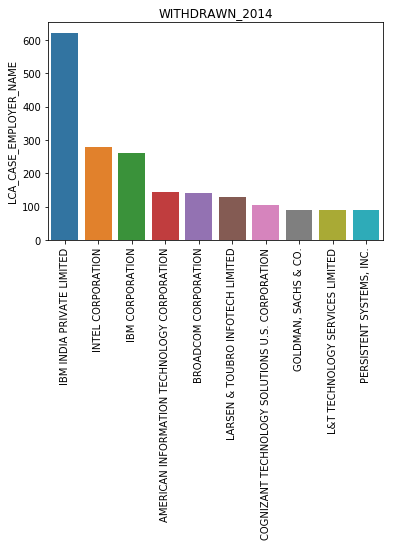

PROGRAMMER ANALYST          1104
SOFTWARE ENGINEER            659
COMPUTER PROGRAMMER          401
SYSTEMS ANALYST              254
SOFTWARE DEVELOPER           211
SENIOR SOFTWARE ENGINEER     207
BUSINESS ANALYST             198
COMPUTER SYSTEMS ANALYST     187
ASSISTANT PROFESSOR          129
SENIOR CONSULTANT            105
Name: LCA_CASE_JOB_TITLE, dtype: int64


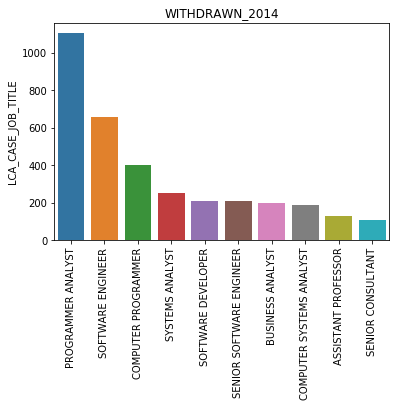

ERNST & YOUNG U.S. LLP                             178
IBM INDIA PRIVATE LIMITED                          120
VENTURESOFT GLOBAL INC                              39
GOOGLE INC.                                         38
BETA SOFT SYSTEMS, INC.                             36
DELOITTE CONSULTING LLP                             36
IGATE TECHNOLOGIES INC.                             32
MASTECH, INC., A MASTECH HOLDINGS, INC. COMPANY     31
TATA CONSULTANCY SERVICES LIMITED                   31
CAPGEMINI U.S. LLC                                  28
Name: LCA_CASE_EMPLOYER_NAME, dtype: int64


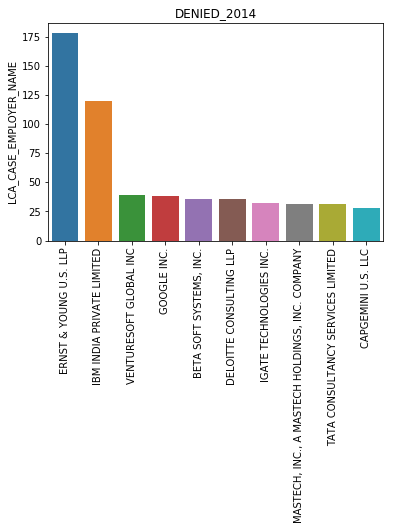

PROGRAMMER ANALYST          582
SOFTWARE ENGINEER           311
COMPUTER PROGRAMMER         182
ACCOUNTANT                  167
SOFTWARE DEVELOPER          156
SYSTEMS ANALYST             122
BUSINESS ANALYST            121
ASSISTANT PROFESSOR         119
MARKET RESEARCH ANALYST      97
COMPUTER SYSTEMS ANALYST     87
Name: LCA_CASE_JOB_TITLE, dtype: int64


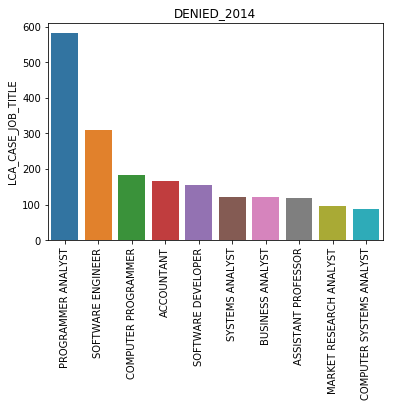

INFOSYS LIMITED                      33216
TATA CONSULTANCY SERVICES LIMITED    16435
WIPRO LIMITED                        10519
ACCENTURE LLP                         9472
IBM INDIA PRIVATE LIMITED             9027
DELOITTE CONSULTING LLP               7514
HCL AMERICA, INC.                     6099
IGATE TECHNOLOGIES INC.               4402
ERNST & YOUNG U.S. LLP                4115
MICROSOFT CORPORATION                 3841
Name: EMPLOYER_NAME, dtype: int64


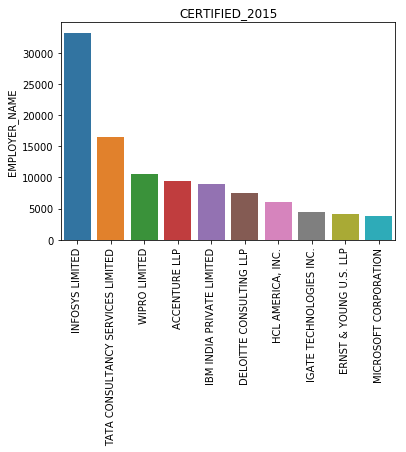

PROGRAMMER ANALYST          48203
SOFTWARE ENGINEER           23352
COMPUTER PROGRAMMER         12971
SYSTEMS ANALYST             11498
SOFTWARE DEVELOPER           9343
TECHNOLOGY LEAD - US         8238
BUSINESS ANALYST             7919
COMPUTER SYSTEMS ANALYST     7234
TECHNOLOGY ANALYST - US      7009
SENIOR SOFTWARE ENGINEER     5324
Name: JOB_TITLE, dtype: int64


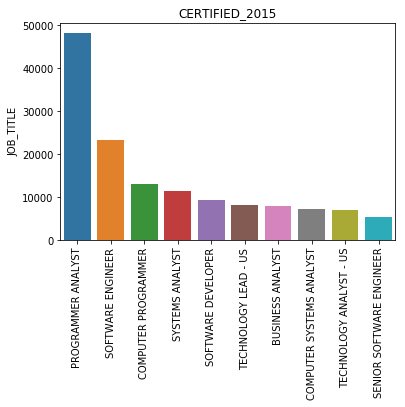

WIPRO LIMITED                         1477
GOOGLE INC.                            951
MICROSOFT CORPORATION                  675
MARLABS, INC                           391
IBM INDIA PRIVATE LIMITED              339
UST GLOBAL INC                         298
V-SOFT CONSULTING GROUP, INC           292
POPULUS GROUP                          284
ERICSSON INC.                          256
CREDIT SUISSE SECURITIES (USA) LLC     232
Name: EMPLOYER_NAME, dtype: int64


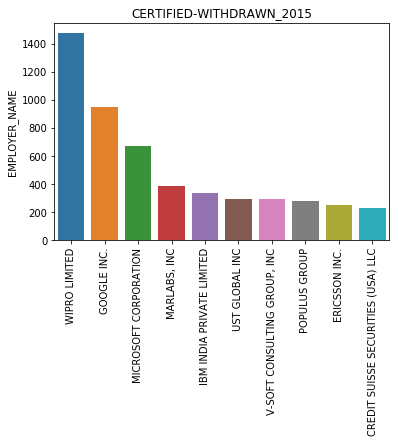

PROGRAMMER ANALYST          3454
SOFTWARE ENGINEER           2653
SYSTEMS ANALYST              872
ASSISTANT PROFESSOR          699
COMPUTER PROGRAMMER          620
SOFTWARE DEVELOPER           598
BUSINESS ANALYST             553
PROGRAMMER/ANALYST           438
SENIOR SOFTWARE ENGINEER     413
RESEARCH ASSOCIATE           393
Name: JOB_TITLE, dtype: int64


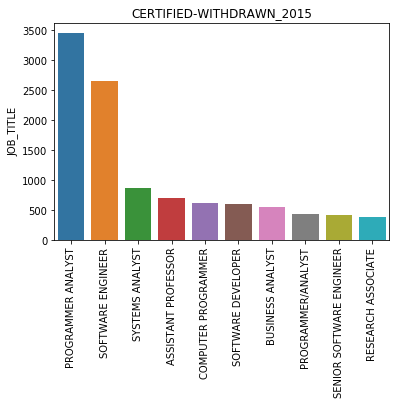

IBM INDIA PRIVATE LIMITED          1161
IBM CORPORATION                     234
INTEL CORPORATION                   203
PERSISTENT SYSTEMS, INC.            178
TECH MAHINDRA (AMERICAS), INC.      173
WIPRO LIMITED                       152
AMAZON CORPORATE LLC                137
UST GLOBAL INC                      123
L&T TECHNOLOGY SERVICES LIMITED     114
IGATE TECHNOLOGIES INC.             112
Name: EMPLOYER_NAME, dtype: int64


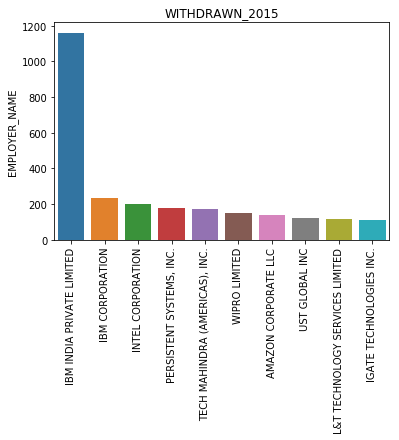

PROGRAMMER ANALYST          1247
SOFTWARE ENGINEER            877
SOFTWARE DEVELOPER           347
COMPUTER PROGRAMMER          334
SYSTEMS ANALYST              316
BUSINESS ANALYST             267
COMPUTER SYSTEMS ANALYST     265
PHYSICAL THERAPIST           202
PROJECT MANAGER              186
SENIOR SOFTWARE ENGINEER     181
Name: JOB_TITLE, dtype: int64


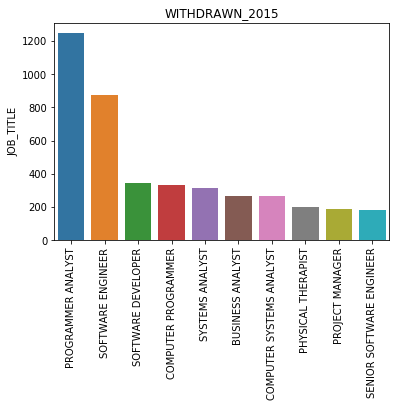

IBM INDIA PRIVATE LIMITED                          166
CONSULTADD INC                                      96
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     92
DELOITTE CONSULTING LLP                             88
GLOBALLOGIC,INC.                                    88
WIPRO LIMITED                                       53
GOOGLE INC.                                         50
TATA CONSULTANCY SERVICES LIMITED                   42
PRICEWATERHOUSECOOPERS LLP                          37
ERNST & YOUNG U.S. LLP                              29
Name: EMPLOYER_NAME, dtype: int64


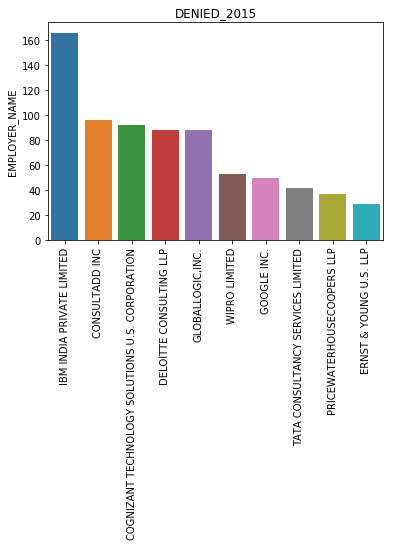

PROGRAMMER ANALYST          533
SOFTWARE ENGINEER           378
SOFTWARE DEVELOPER          153
ACCOUNTANT                  130
COMPUTER PROGRAMMER         130
SYSTEMS ANALYST             117
BUSINESS ANALYST            114
SENIOR SOFTWARE ENGINEER     95
COMPUTER SYSTEMS ANALYST     95
PHYSICAL THERAPIST           90
Name: JOB_TITLE, dtype: int64


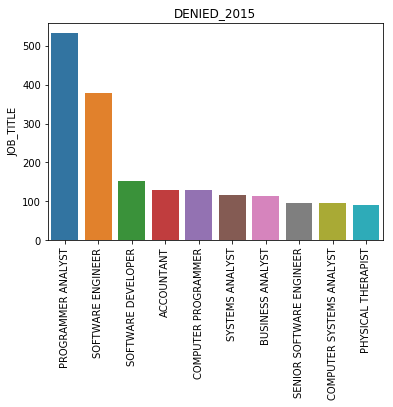

INFOSYS LIMITED                      25322
CAPGEMINI AMERICA INC                15957
TATA CONSULTANCY SERVICES LIMITED    13072
WIPRO LIMITED                         9528
ACCENTURE LLP                         9374
IBM INDIA PRIVATE LIMITED             7824
DELOITTE CONSULTING LLP               7500
TECH MAHINDRA (AMERICAS),INC.         6681
HCL AMERICA, INC.                     4917
MICROSOFT CORPORATION                 4669
Name: EMPLOYER_NAME, dtype: int64


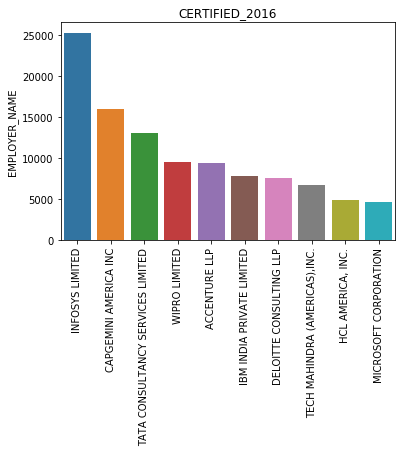

PROGRAMMER ANALYST          47964
SOFTWARE ENGINEER           25890
SOFTWARE DEVELOPER          12474
SYSTEMS ANALYST             10986
COMPUTER PROGRAMMER         10528
BUSINESS ANALYST             8175
COMPUTER SYSTEMS ANALYST     6205
DEVELOPER                    5912
SENIOR SOFTWARE ENGINEER     5630
TECHNOLOGY LEAD - US         5405
Name: JOB_TITLE, dtype: int64


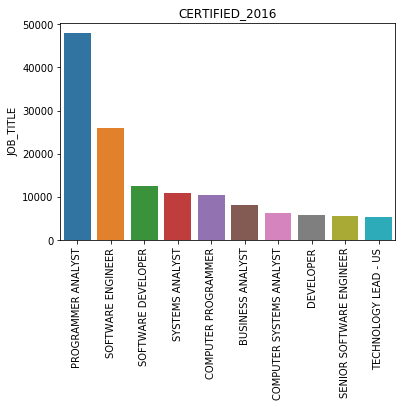

GOOGLE INC.                                        1420
WIPRO LIMITED                                       876
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     660
IBM INDIA PRIVATE LIMITED                           522
CAPGEMINI AMERICA INC                               426
CERNER CORPORATION                                  364
V-SOFT CONSULTING GROUP, INC                        359
MICROSOFT CORPORATION                               328
DIVENSI INC.                                        304
ERICSSON INC.                                       291
Name: EMPLOYER_NAME, dtype: int64


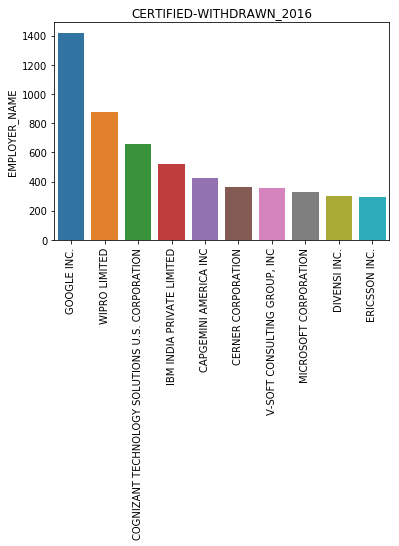

PROGRAMMER ANALYST          3896
SOFTWARE ENGINEER           3553
SOFTWARE DEVELOPER           919
ASSISTANT PROFESSOR          823
SYSTEMS ANALYST              793
BUSINESS ANALYST             658
COMPUTER PROGRAMMER          651
SENIOR SOFTWARE ENGINEER     476
RESEARCH ASSOCIATE           420
COMPUTER SYSTEMS ANALYST     417
Name: JOB_TITLE, dtype: int64


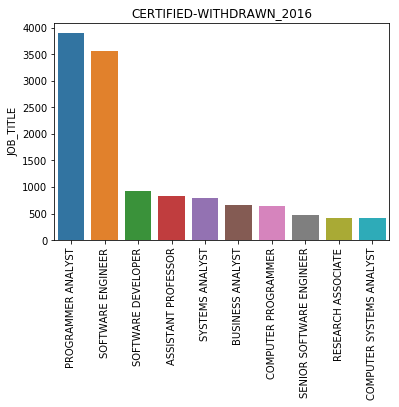

IBM INDIA PRIVATE LIMITED                          1404
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     654
IBM CORPORATION                                     594
CAPGEMINI AMERICA INC                               267
CUMMINS INC.                                        267
IGATE TECHNOLOGIES INC.                             164
GOOGLE INC.                                         147
WIPRO LIMITED                                       145
ADVISEAN LLC                                        144
L&T TECHNOLOGY SERVICES LIMITED                     142
Name: EMPLOYER_NAME, dtype: int64


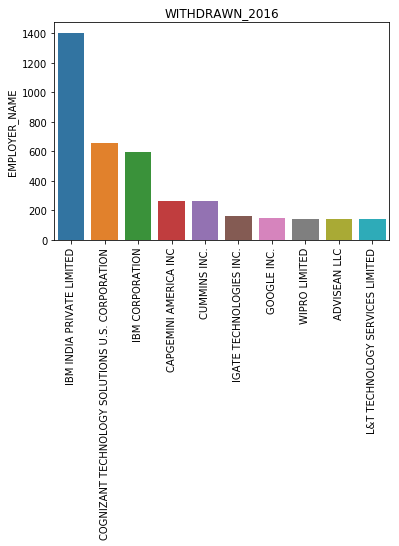

PROGRAMMER ANALYST          1516
SOFTWARE ENGINEER            953
SOFTWARE DEVELOPER           490
SYSTEMS ANALYST              451
COMPUTER PROGRAMMER          379
SENIOR SOFTWARE ENGINEER     256
BUSINESS ANALYST             252
COMPUTER SYSTEMS ANALYST     215
SENIOR CONSULTANT            196
APPLICATION DEVELOPER        184
Name: JOB_TITLE, dtype: int64


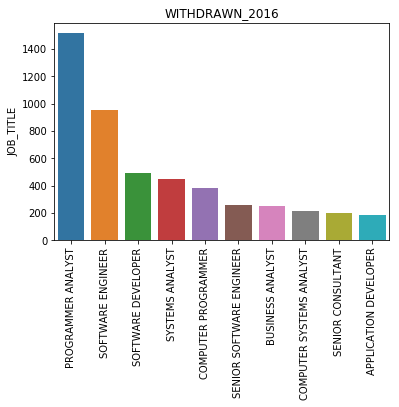

DELOITTE CONSULTING LLP        95
CAPGEMINI AMERICA INC          75
ACCENZ LLC                     70
WIPRO LIMITED                  58
ERNST & YOUNG U.S. LLP         44
IBM CORPORATION                44
GOOGLE INC.                    41
IBM INDIA PRIVATE LIMITED      37
PIXAWARE TECHNOLOGIES, LLC     31
QUALCOMM TECHNOLOGIES, INC.    23
Name: EMPLOYER_NAME, dtype: int64


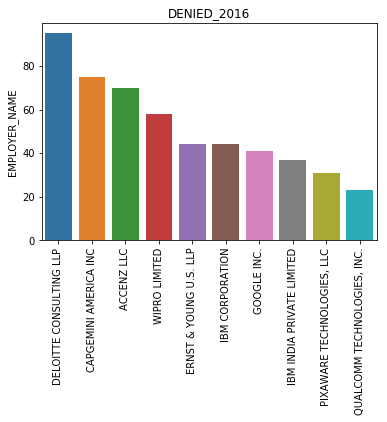

PROGRAMMER ANALYST          367
SOFTWARE ENGINEER           272
SOFTWARE DEVELOPER          158
ACCOUNTANT                  117
COMPUTER PROGRAMMER         110
SYSTEMS ANALYST              84
BUSINESS ANALYST             82
SENIOR SOFTWARE ENGINEER     77
PHYSICAL THERAPIST           74
COMPUTER SYSTEMS ANALYST     63
Name: JOB_TITLE, dtype: int64


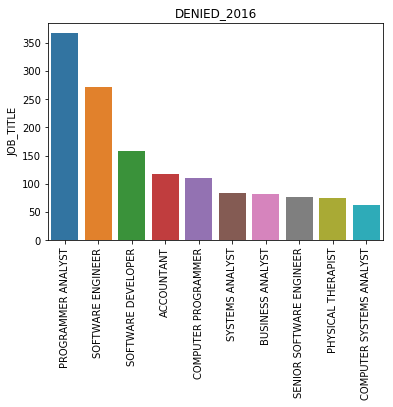

In [26]:
for i, df in enumerate(df_list):
    head = [ i for i in list(df) if re.search("STATUS",i)][0]
    year = year_list[i]
    for stat in valid_status_list:
        query = [ i for i in list(df) if re.search("EMPLOYER",i)][0]
        rank = df[df[head]==stat][query].value_counts().iloc[:10]
        plt.title(stat+"_"+year)
        rank_bar(rank)
        
        query = [ i for i in list(df) if re.search("JOB_TITLE",i)][0]
        rank = df[df[head]==stat][query].value_counts().iloc[:10]
        plt.title(stat+"_"+year)
        rank_bar(rank)

VISA_CLASS which is STATUS ="CERTIFIED" distribution

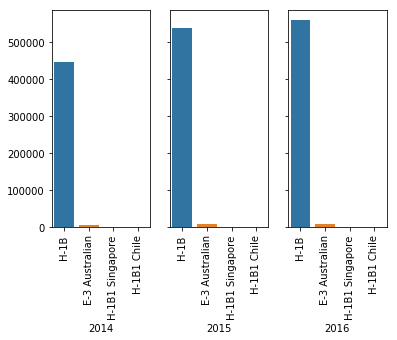

In [30]:
fig, axn = plt.subplots(1,len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    query_heard = [i for i in list(df) if re.search("VISA_CLASS",i)][0]
    item_counts = df[df[result_head] == 'CERTIFIED'][query_heard].value_counts()
    total = df[df[result_head] == 'CERTIFIED'][query_heard].shape[0]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
    bar_plot.set_xlabel(year_list[j])
plt.show()

__Ratio__ of Top 10 Employer among all results which are "CERTIFIED"

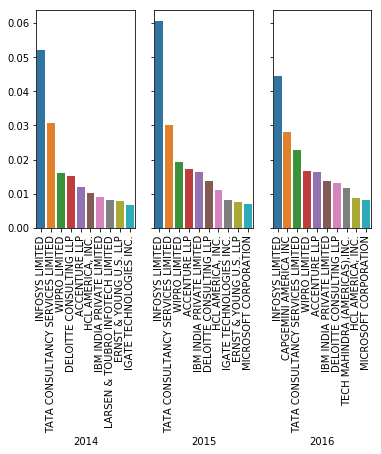

In [31]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    query_heard = [i for i in list(df) if re.search("EMPLOYER_NAME",i)][0]
    item_counts = df[df[result_head] == 'CERTIFIED'][query_heard].value_counts()[:10]
    total = df[df[result_head] == 'CERTIFIED'][query_heard].shape[0]
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
    bar_plot.set_xlabel(year_list[j])
plt.show()

__Ratio__ of Top 10 Employer/among all results except "CERTIFIED"

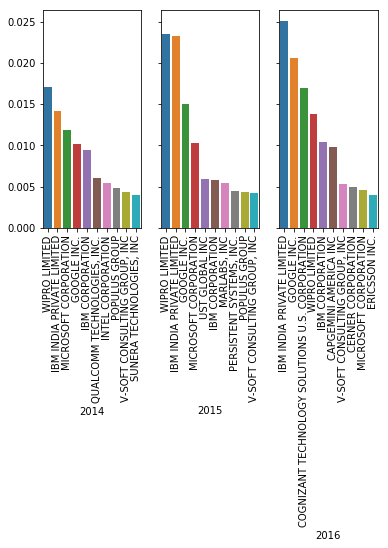

In [32]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    query_heard = [i for i in list(df) if re.search("EMPLOYER_NAME",i)][0]
    item_counts = df[df[result_head] != 'CERTIFIED'][query_heard].value_counts()[:10]
    total = df[df[result_head] != 'CERTIFIED'][query_heard].shape[0]
#     print( item_counts)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
    bar_plot.set_xlabel(year_list[j])
plt.show()

Top 10 cities where the applications are 'CERTIFIED'

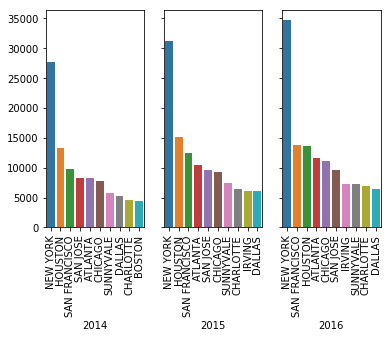

In [33]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    query_heard = [i for i in list(df) if re.search("WORK.*CITY",i)][0]
    item_counts = df[df[result_head] == 'CERTIFIED'][query_heard].value_counts()[:10]
    total = df[df[result_head] == 'CERTIFIED'][query_heard].shape[0]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
    bar_plot.set_xlabel(year_list[j])
plt.show()

Top 10 cities where the applications are not 'CERTIFIED'

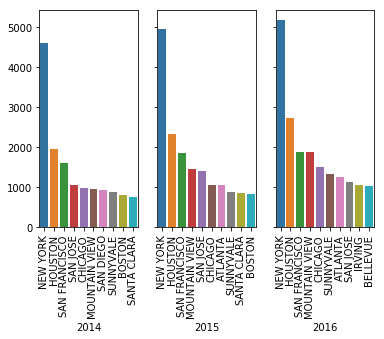

In [35]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    query_heard = [i for i in list(df) if re.search("WORK.*CITY",i)][0]
    item_counts = df[df[result_head] != 'CERTIFIED'][query_heard].value_counts()[:10]
    total = df[df[result_head] != 'CERTIFIED'][query_heard].shape[0]
#     print( item_counts)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
    bar_plot.set_xlabel(year_list[j])
plt.show()

In New York , what kinds of job titles are CERTIFIED or not CERTIFIED most ? 

MOST CERTIFIED Job Title


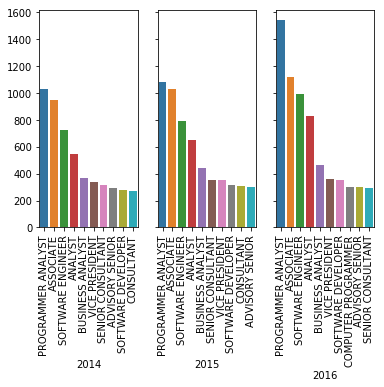

Most not CERTIFIED Job Title


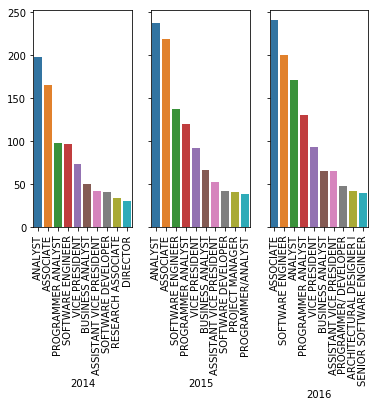

In [38]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
print("MOST CERTIFIED Job Title")
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    workcity_head = [i for i in list(df) if re.search("WORK.*CITY",i)][0]
    query_head = [i for i in list(df) if re.search("JOB_TITLE",i)][0]
    mask = (df[result_head] == 'CERTIFIED') & (df[workcity_head] == 'NEW YORK')
    item_counts = df[mask][query_head].value_counts()[:10]
    total = df[df[result_head] == 'CERTIFIED'][query_head].shape[0]
#     print( item_counts)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
    bar_plot.set_xlabel(year_list[j])
plt.show()

print("Most not CERTIFIED Job Title")
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    workcity_head = [i for i in list(df) if re.search("WORK.*CITY",i)][0]
    query_head = [i for i in list(df) if re.search("JOB_TITLE",i)][0]
    mask = (df[result_head] != 'CERTIFIED') & (df[workcity_head] == 'NEW YORK')
    item_counts = df[mask][query_head].value_counts()[:10]
    total = df[df[result_head] != 'CERTIFIED'][query_head].shape[0]
#     print( item_counts)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
    bar_plot.set_xlabel(year_list[j])
plt.show()

distribution of different fields by the result 

NEW YORK and application numbers
CERTIFIED              27580
CERTIFIED-WITHDRAWN     2499
WITHDRAWN               1112
DENIED                   994
Name: STATUS, dtype: int64


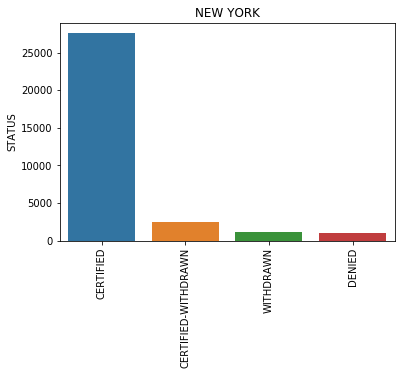

HOUSTON and application numbers
CERTIFIED              13330
CERTIFIED-WITHDRAWN     1115
WITHDRAWN                470
DENIED                   377
Name: STATUS, dtype: int64


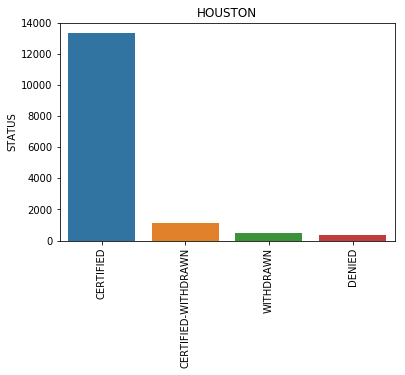

SAN FRANCISCO and application numbers
CERTIFIED              9756
CERTIFIED-WITHDRAWN     974
WITHDRAWN               358
DENIED                  283
Name: STATUS, dtype: int64


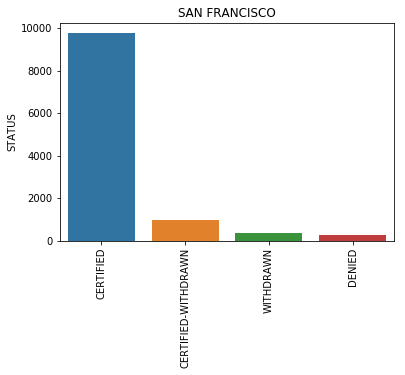

SAN JOSE and application numbers
CERTIFIED              8216
CERTIFIED-WITHDRAWN     691
WITHDRAWN               229
DENIED                  136
Name: STATUS, dtype: int64


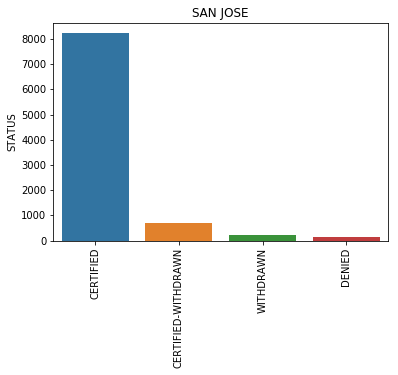

ATLANTA and application numbers
CERTIFIED              8189
CERTIFIED-WITHDRAWN     398
WITHDRAWN               235
DENIED                  117
Name: STATUS, dtype: int64


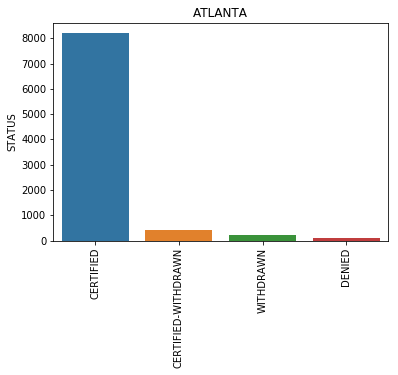

CHICAGO and application numbers
CERTIFIED              7748
CERTIFIED-WITHDRAWN     553
WITHDRAWN               234
DENIED                  205
Name: STATUS, dtype: int64


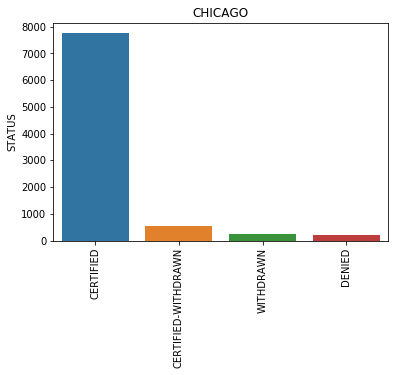

SUNNYVALE and application numbers
CERTIFIED              5694
CERTIFIED-WITHDRAWN     575
WITHDRAWN               240
DENIED                   56
Name: STATUS, dtype: int64


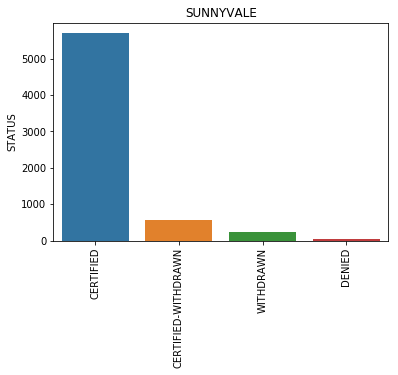

DALLAS and application numbers
CERTIFIED              5319
CERTIFIED-WITHDRAWN     289
WITHDRAWN               197
DENIED                  110
Name: STATUS, dtype: int64


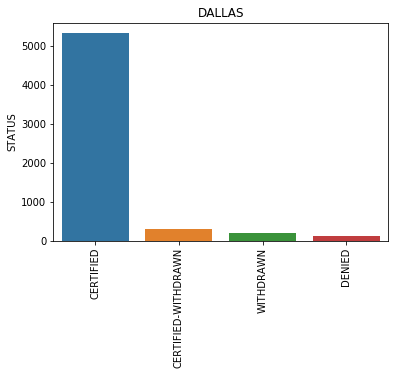

MOUNTAIN VIEW and application numbers
CERTIFIED              4379
CERTIFIED-WITHDRAWN     789
WITHDRAWN               102
DENIED                   68
Name: STATUS, dtype: int64


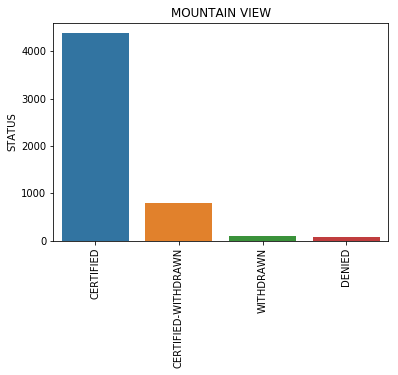

BOSTON and application numbers
CERTIFIED              4407
CERTIFIED-WITHDRAWN     537
DENIED                  161
WITHDRAWN               113
Name: STATUS, dtype: int64


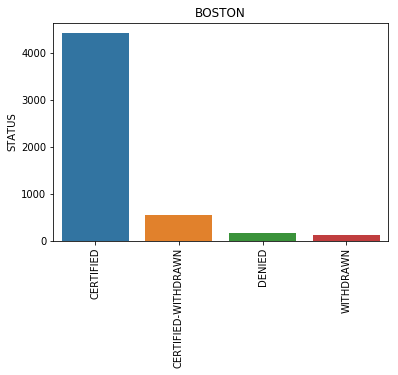

NEW YORK and application numbers
CERTIFIED              31209
CERTIFIED-WITHDRAWN     2949
WITHDRAWN               1173
DENIED                   841
Name: CASE_STATUS, dtype: int64


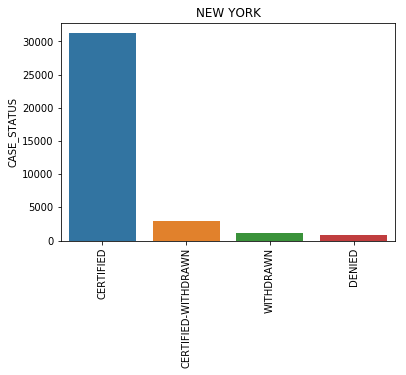

HOUSTON and application numbers
CERTIFIED              15133
CERTIFIED-WITHDRAWN     1366
WITHDRAWN                656
DENIED                   303
Name: CASE_STATUS, dtype: int64


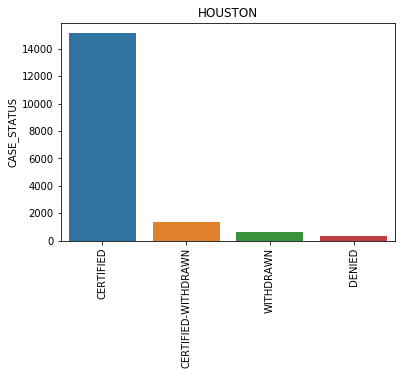

SAN FRANCISCO and application numbers
CERTIFIED              12516
CERTIFIED-WITHDRAWN     1210
WITHDRAWN                401
DENIED                   248
Name: CASE_STATUS, dtype: int64


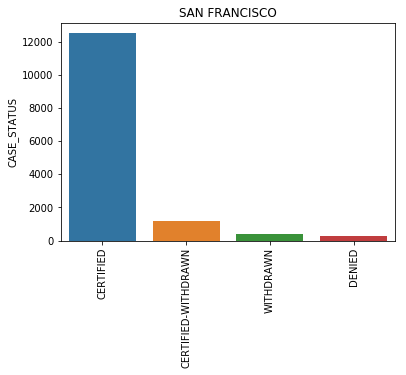

ATLANTA and application numbers
CERTIFIED              10470
CERTIFIED-WITHDRAWN      628
WITHDRAWN                287
DENIED                   137
Name: CASE_STATUS, dtype: int64


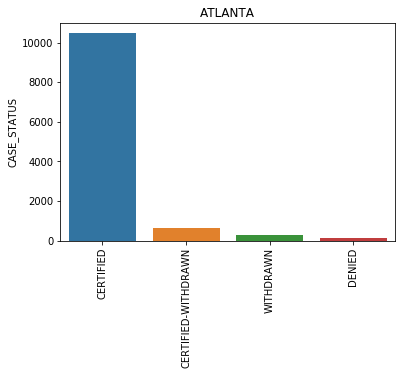

SAN JOSE and application numbers
CERTIFIED              9578
CERTIFIED-WITHDRAWN     884
WITHDRAWN               300
DENIED                  210
Name: CASE_STATUS, dtype: int64


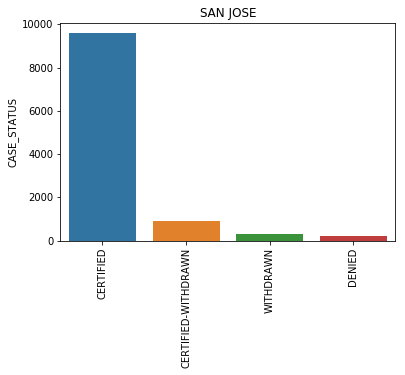

CHICAGO and application numbers
CERTIFIED              9229
CERTIFIED-WITHDRAWN     543
WITHDRAWN               312
DENIED                  210
Name: CASE_STATUS, dtype: int64


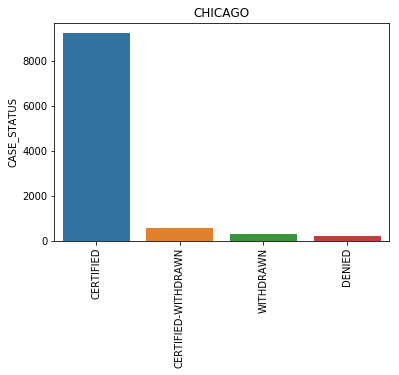

SUNNYVALE and application numbers
CERTIFIED              7470
CERTIFIED-WITHDRAWN     595
WITHDRAWN               230
DENIED                   64
Name: CASE_STATUS, dtype: int64


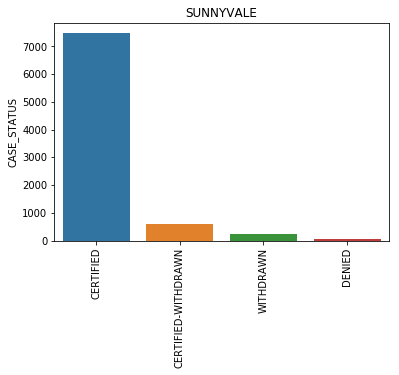

CHARLOTTE and application numbers
CERTIFIED              6501
CERTIFIED-WITHDRAWN     216
WITHDRAWN               178
DENIED                   67
Name: CASE_STATUS, dtype: int64


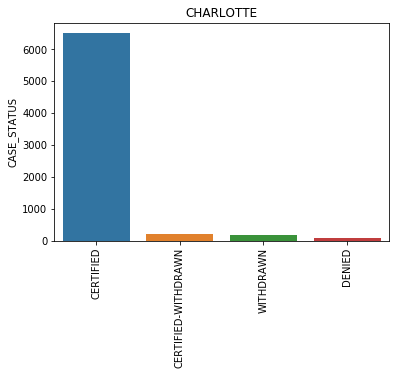

IRVING and application numbers
CERTIFIED              6112
CERTIFIED-WITHDRAWN     353
WITHDRAWN               167
DENIED                   77
Name: CASE_STATUS, dtype: int64


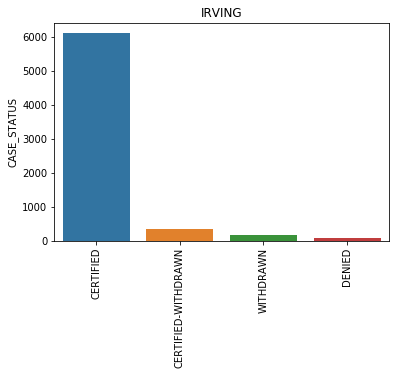

DALLAS and application numbers
CERTIFIED              6019
CERTIFIED-WITHDRAWN     288
WITHDRAWN               194
DENIED                  105
Name: CASE_STATUS, dtype: int64


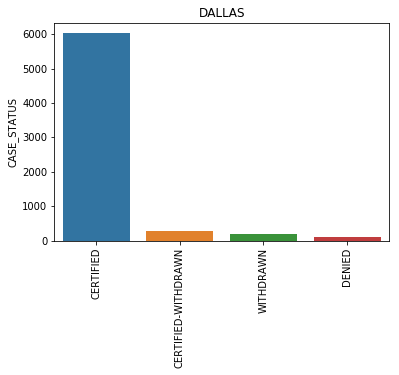

NEW YORK and application numbers
CERTIFIED              34615
CERTIFIED-WITHDRAWN     3100
WITHDRAWN               1310
DENIED                   763
Name: CASE_STATUS, dtype: int64


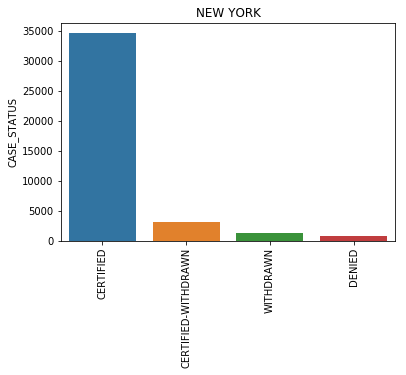

HOUSTON and application numbers
CERTIFIED              13649
CERTIFIED-WITHDRAWN     1862
WITHDRAWN                634
DENIED                   227
Name: CASE_STATUS, dtype: int64


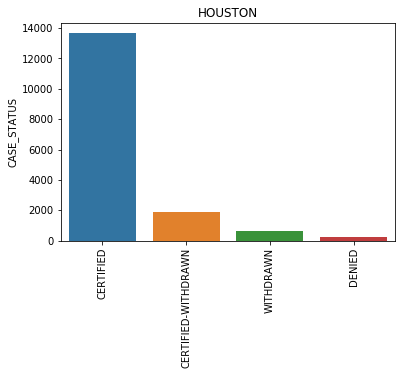

SAN FRANCISCO and application numbers
CERTIFIED              13770
CERTIFIED-WITHDRAWN     1187
WITHDRAWN                473
DENIED                   227
Name: CASE_STATUS, dtype: int64


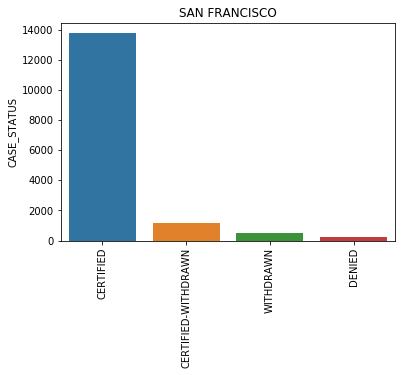

ATLANTA and application numbers
CERTIFIED              11643
CERTIFIED-WITHDRAWN      701
WITHDRAWN                438
DENIED                   122
Name: CASE_STATUS, dtype: int64


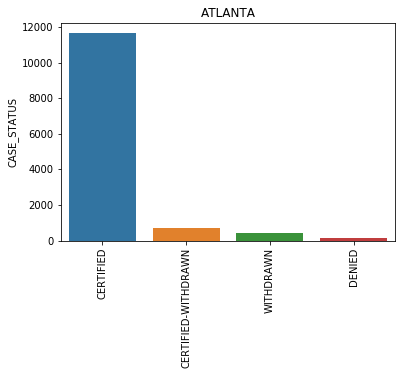

CHICAGO and application numbers
CERTIFIED              11056
CERTIFIED-WITHDRAWN      933
WITHDRAWN                425
DENIED                   156
Name: CASE_STATUS, dtype: int64


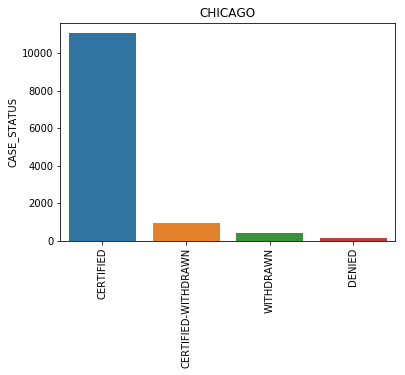

SAN JOSE and application numbers
CERTIFIED              9636
CERTIFIED-WITHDRAWN     691
WITHDRAWN               311
DENIED                  134
Name: CASE_STATUS, dtype: int64


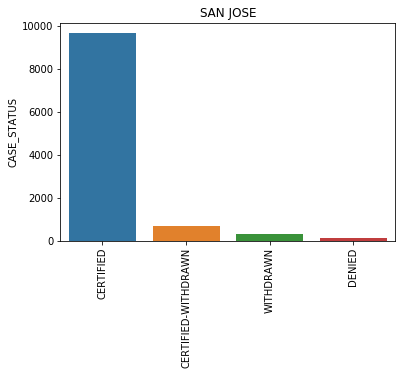

SUNNYVALE and application numbers
CERTIFIED              7207
CERTIFIED-WITHDRAWN     942
WITHDRAWN               311
DENIED                   71
Name: CASE_STATUS, dtype: int64


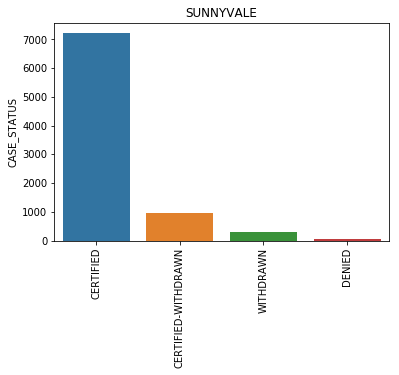

IRVING and application numbers
CERTIFIED              7284
CERTIFIED-WITHDRAWN     536
WITHDRAWN               453
DENIED                   68
Name: CASE_STATUS, dtype: int64


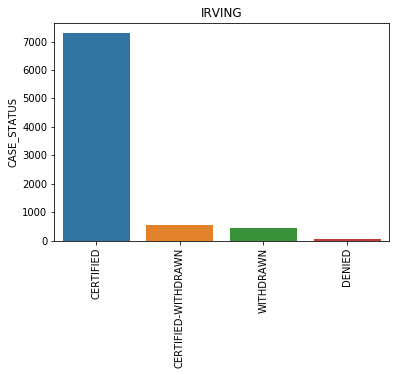

CHARLOTTE and application numbers
CERTIFIED              6964
CERTIFIED-WITHDRAWN     338
WITHDRAWN               166
DENIED                   50
Name: CASE_STATUS, dtype: int64


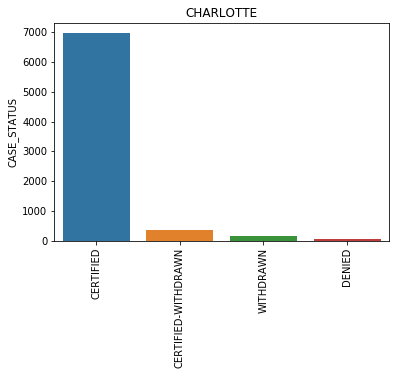

MOUNTAIN VIEW and application numbers
CERTIFIED              5572
CERTIFIED-WITHDRAWN    1558
WITHDRAWN               250
DENIED                   75
Name: CASE_STATUS, dtype: int64


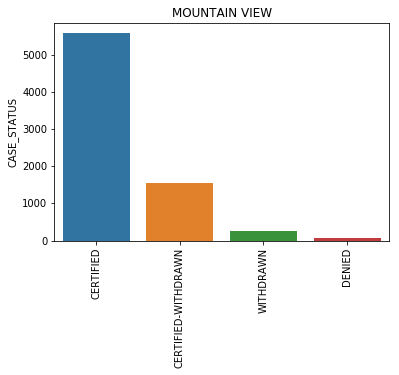

In [43]:
query_match = "WORK.*CITY" # replace with any field
for df in df_list:
    query_head = [ i for i in list(df) if re.search(query_match,i)][0]
    status_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    top_list = (df[query_head].value_counts().index[:10].values)
    
    for i in top_list:
        print(i,"and application numbers")
        plt.title(i)
        mask = (df[query_head]==i) 
        item_counts = df[mask][status_head].value_counts()[:4] # 4 : don't care the rest of invalid status
        rank_bar(item_counts)